In [1]:
import xarray as xr
import xesmf as xe
import numpy as np

In [2]:
# from http://www.ncl.ucar.edu/Applications/Data/#cdf
ds = xr.open_dataset('/glade/scratch/molina/landsea.nc')

In [3]:
offset=0.5
dcoord=1.0
lat_coord='lat'
lon_coord='lon'

In [4]:
lat0_bnd = int(np.around(ds[lat_coord].min(skipna=True).values))
lat1_bnd = int(np.around(ds[lat_coord].max(skipna=True).values))
lon0_bnd = int(np.around(ds[lon_coord].min(skipna=True).values))
lon1_bnd = int(np.around(ds[lon_coord].max(skipna=True).values))-1

In [5]:
ds_out = xe.util.grid_2d(lon0_b=lon0_bnd-offset, lon1_b=lon1_bnd+offset, d_lon=dcoord, 
                         lat0_b=lat0_bnd-offset, lat1_b=lat1_bnd+offset, d_lat=dcoord)

In [6]:
regridder = xe.Regridder(ds, ds_out, method='nearest_s2d', reuse_weights=True)

dr_out = regridder(ds['LSMASK'], keep_attrs=True)
dr_out = dr_out.assign_coords(lon=('x', dr_out.coords['lon'][0,:].values), lat=('y', dr_out.coords['lat'][:,0].values))
dr_out = dr_out.rename(y='lat', x='lon')

Reuse existing file: nearest_s2d_180x360_181x360.nc


/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/xesmf/frontend.py:421: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


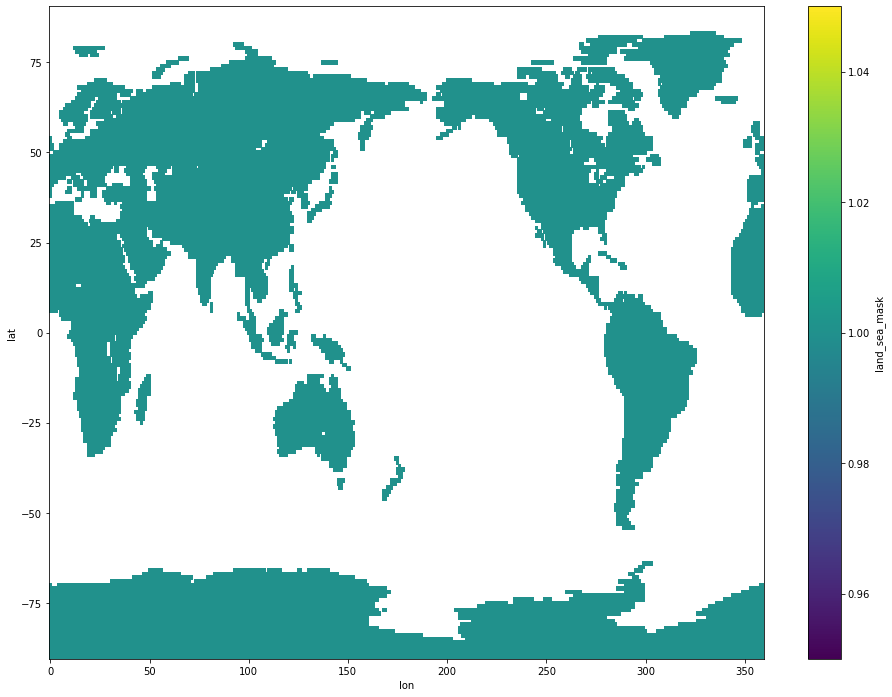

In [8]:
dr_out.where(dr_out==1).plot.pcolormesh(figsize=(16,12));

In [9]:
dr_out

<xarray.DataArray 'LSMASK' (lat: 181, lon: 360)>
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Attributes:
    long_name:      land_sea_mask
    regrid_method:  nearest_s2d

In [10]:
dr_out.to_netcdf('/glade/scratch/molina/s2s/CESM2/landsea_s2s.nc')